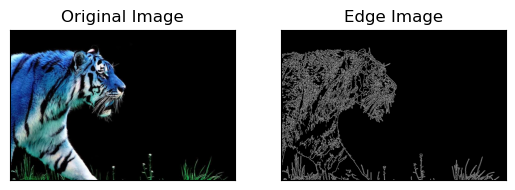

In [8]:
#Canny Edge Detection in OpenCV

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(r'C:\Users\RCPIT\Desktop\input_image.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
import cv2
 
# Read the original image
img = cv2.imread(r"C:\Users\RCPIT\Desktop\input_image.jpg") 
# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)
 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)
 
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)
 
cv2.destroyAllWindows()

In [14]:
# Harris Corner Detector in OpenCV
import numpy as np
import cv2 as cv
filename = r"C:\Users\RCPIT\Desktop\input_image.jpg"
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

C:\Users\RCPIT\AppData\Local\Temp\ipykernel_15900\3021611867.py:15: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


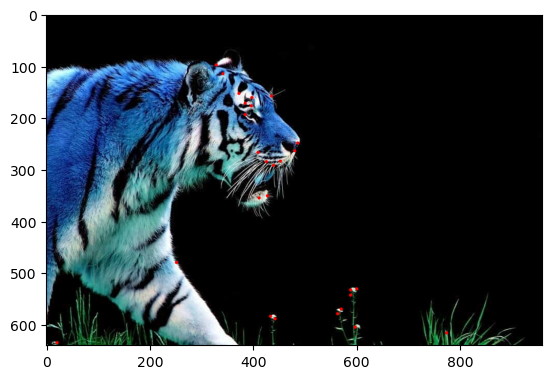

(<matplotlib.image.AxesImage at 0x2b2108b3190>, None)

In [11]:
# Shi-Tomasi Corner Detector & Good Features to Track
# import the required library 
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 


# read the image 
img = cv2.imread(r"C:\Users\RCPIT\Desktop\input_image.jpg") 

# convert image to gray scale image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

# detect corners with the goodFeaturesToTrack function. 
corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10) 
corners = np.int0(corners) 

# we iterate through each corner, 
# making a circle at each point that we think is a corner. 
for i in corners: 
	x, y = i.ravel() 
	cv2.circle(img, (x, y), 3, 255, -1) 

plt.imshow(img), plt.show() 


In [ ]:
import cv2
import numpy as np 

# Load the image
image = cv2.imread(r"C:\Users\RCPIT\Desktop\input_image.jpg")

# Create a copy of the original image
image_copy = image.copy()

# Build the image pyramid
pyramid = [image_copy]
while True:
    # Resize the image to half of its size
    resized_image = cv2.pyrDown(image_copy)
    
    # Break the loop when the resized image is too small
    if resized_image.shape[0] < 30 or resized_image.shape[1] < 30:
        break
    
    # Add the resized image to the pyramid
    pyramid.append(resized_image)
    
    # Update the copy of the original image for the next iteration
    image_copy = resized_image

# Detect features on each level of the pyramid
for level, img in enumerate(pyramid):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect features using a feature detection method of your choice
    # Here, we use the Shi-Tomasi Corner Detector as an example
    corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
    
    if corners is not None:
        # Convert corners to integers
        corners = np.int0(corners)
        
        # Draw circles around detected corners
        for corner in corners:
            x, y = corner.ravel()
            cv2.circle(image, (x, y), 3, (0, 255, 0), -1)
    
    # Display the image with detected features
    cv2.imshow(f"Features Detected - Level {level}", img)

# Display the original image with detected features
cv2.imshow('Original Image with Features Detected', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\RCPIT\AppData\Local\Temp\ipykernel_8956\1553398647.py:37: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)
